To investigate the peak i see in emission at 0.78 microns ive replotted at a smaller scale

In [1]:
#Import modules needed
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("..")
#%matplotlib notebook #Uncomment this to have interactive plots

In [2]:

#################################### FUNCTIONS ####################################

def read_and_plot(ax, path, label="", width=1, style="-", color="blue", alpha=0.6, rebin=0):
    """A plotting function taken from helios to read and plot the spectral data
    Inputs:
        ax = axis which the data is plotted on
        path = the directory file path of the flux data files
        label = the name you wish to attach to the plot on the legend
        width = width of the lines in the plot
        style = linestyle used in the plot
        color = color of the lines
        alpha = transparency of the color of the lines
        rebin =
        
    """

    if 'flux_ratio' in path:
        data = np.loadtxt(path)
        lamda, spec = data[:,0], data[:,1]*1e6#*((1*6371000)/(0.681*696000000))**2
    else:
        lamda, spec = tls.read_helios_spectrum(path, type='emission')

    if rebin > 0:
        lamda, spec = tls.rebin_spectrum_to_resolution(lamda, spec, resolution=rebin, w_unit='micron')

    line, = ax.plot(lamda, spec, color=color,linewidth=width, linestyle=style, label=label, alpha=alpha)

    return line

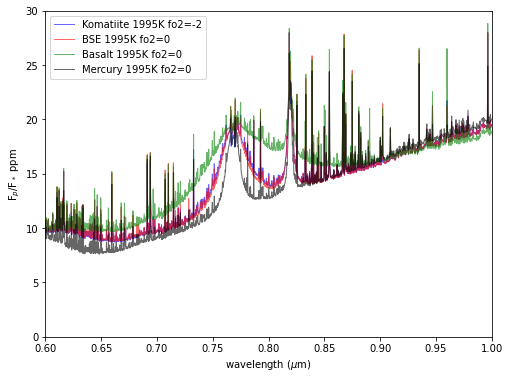

In [3]:
#Create the figure
fig, ax = plt.subplots(figsize=(8,6))

#Plot the four compostions at fo2=-2 for the hump region at 0.78 microns
read_and_plot(ax, "Komatiite_1995_fo2_-2_flux_ratio.dat",label='Komatiite 1995K fo2=-2',color='blue')
read_and_plot(ax, "BSE_1995_fo2_-2_flux_ratio.dat",label='BSE 1995K fo2=0',color='red')
read_and_plot(ax, "Basalt_1995_fo2_-2_flux_ratio.dat",label='Basalt 1995K fo2=0',color='green')
read_and_plot(ax, "Mercury_1995_fo2_-2_flux_ratio.dat",label='Mercury 1995K fo2=0',color='black')

#Customise axies
ax.set(xlim=[0.6, 1], xlabel='wavelength ($\mu$m)', ylabel='F$_p$/F$_*$ ppm')
ax.set_ylim(0,30)

#Add legend
ax.legend(loc='best', frameon=True)

#Uncomment the below line to save plot
#plt.savefig("output_plots/Mercury/spectrum_fo2=2.png")

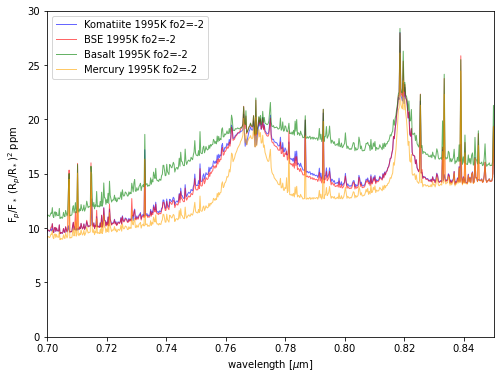

In [4]:
#Create figure
fig, ax = plt.subplots(figsize=(8,6))

#Plot the spectrums for each compostion
read_and_plot(ax, "Komatiite_1995_fo2_-2_flux_ratio.dat",label='Komatiite 1995K fo2=-2',color='blue')
read_and_plot(ax, "BSE_1995_fo2_-2_flux_ratio.dat",label='BSE 1995K fo2=-2',color='red')
read_and_plot(ax, "Basalt_1995_fo2_-2_flux_ratio.dat",label='Basalt 1995K fo2=-2',color='green')
read_and_plot(ax, "Mercury_1995_fo2_-2_flux_ratio.dat",label='Mercury 1995K fo2=-2',color='orange')

#Customise axis
ax.set(xlim=[0.7, .85], xlabel='wavelength [$\mu$m]', ylabel='F$_p$/F$_*$ (R$_p$/R$_*$)$^2$ ppm')
ax.set_ylim(0,30)

#Add legend
ax.legend(loc='best', frameon=True)

#Save figure
plt.savefig("Compostion spectra at the 0.75 micron hump.png")

FWHM plot

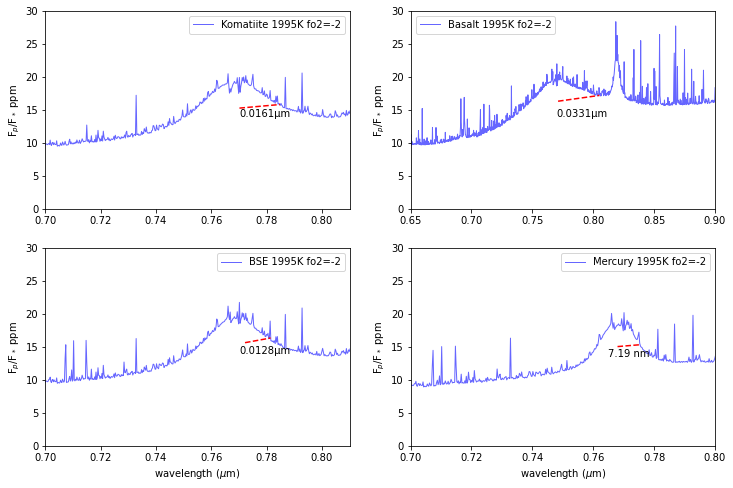

In [5]:
#Create figure
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,8))

#Plot the komatiite
ax=axes[0,0] # Set the axis
read_and_plot(ax, "Komatiite_1995_fo2_-2_flux_ratio.dat",label='Komatiite 1995K fo2=-2',color='blue') #Plot Komatiite
#Customise the axis
ax.set(xlim=[0.7, .81], xlabel='', ylabel='F$_p$/F$_*$ ppm') 
ax.set_ylim(0,30)
#Create the starting and end points of the arrows
xvalues = [0.770146,0.78478]
yvalues = [15.2496,15.7942]
ax.annotate('0.0161\u03BCm', (0.77,14))
ax.plot(xvalues,yvalues, 'red' ,linestyle='--')
#Add the legend
ax.legend(loc='best', frameon=True)

#Plot the BSE
ax1=axes[1,0] #Set the axis
read_and_plot(ax1, "BSE_1995_fo2_-2_flux_ratio.dat",label='BSE 1995K fo2=-2',color='blue') #Plot BSE
#Customise the axis
ax1.set(xlim=[0.7, .81], xlabel='wavelength ($\mu$m)', ylabel='F$_p$/F$_*$ ppm')
ax1.set_ylim(0,30)
#Create the starting and end points of the arrows
xvalues1 = [0.772152,0.781402]
yvalues1 = [15.6496,16.3584]
ax1.annotate('0.0128\u03BCm', (0.77,14))
ax1.plot(xvalues1,yvalues1, 'red' ,linestyle='--')
#Add the legend
ax1.legend(loc='best', frameon=True)

#Plot the Basalt
ax2=axes[0,1]#Set the axis
read_and_plot(ax2, "Basalt_1995_fo2_-2_flux_ratio.dat",label='Basalt 1995K fo2=-2',color='blue') #Plot Basalt
#Customise the axis
ax2.set(xlim=[0.65, .9], xlabel='', ylabel='F$_p$/F$_*$ ppm')
ax2.set_ylim(0,30)
#Create the starting and end points of the arrows
xvalues2 = [0.771151,0.80513]
yvalues2 = [16.2962,17.1769]
ax2.annotate('0.0331\u03BCm', (0.77,14))
ax2.plot(xvalues2,yvalues2, 'red' ,linestyle='--')
#Add the legend
ax2.legend(loc='best', frameon=True)

#Plot the Mercury
ax3=axes[1,1]#Set the axis
read_and_plot(ax3, "Mercury_1995_fo2_-2_flux_ratio.dat",label='Mercury 1995K fo2=-2',color='blue') #Plot Mercury
#Customise the axis
ax3.set(xlim=[0.7, .8], xlabel='wavelength ($\mu$m)', ylabel='F$_p$/F$_*$ ppm')
ax3.set_ylim(0,30)
#Create the starting and end points of the arrows
xvalues3 = [0.767992,0.77538]
yvalues3 = [15.0584,15.34]
ax3.annotate('7.19 nm', (0.765,13.5))
ax3.plot(xvalues3,yvalues3, 'red' ,linestyle='--')
#Add the legend
ax3.legend(loc='best', frameon=True)

In [6]:
#In order to shade the areas under the plots, the wavelength and spectral data was needed for each compostion so I extracted
# Helios Plotting function code which was needed

#Extract the Komatiite data
path = 'Komatiite_1995_fo2_-2_flux_ratio.dat'
if 'flux_ratio' in path:
        data = np.loadtxt(path)
        lamda, spec = data[:,0], data[:,1]*1e6
else:
        lamda, spec = tls.read_helios_spectrum(path, type='emission')

#Extract the BSE data
path1 = 'BSE_1995_fo2_-2_flux_ratio.dat'
if 'flux_ratio' in path:
        data = np.loadtxt(path1)
        lamda1, spec1 = data[:,0], data[:,1]*1e6
else:
        lamda1, spec1 = tls.read_helios_spectrum(path, type='emission')

#Extract the Basalt data
path2 = 'Basalt_1995_fo2_-2_flux_ratio.dat'
if 'flux_ratio' in path:
        data = np.loadtxt(path2)
        lamda2, spec2 = data[:,0], data[:,1]*1e6
else:
        lamda2, spec2 = tls.read_helios_spectrum(path, type='emission')

#Extract the Mercury data
path3 = 'Mercury_1995_fo2_-2_flux_ratio.dat'
if 'flux_ratio' in path:
        data = np.loadtxt(path3)
        lamda3, spec3 = data[:,0], data[:,1]*1e6
else:
        lamda3, spec3 = tls.read_helios_spectrum(path, type='emission')


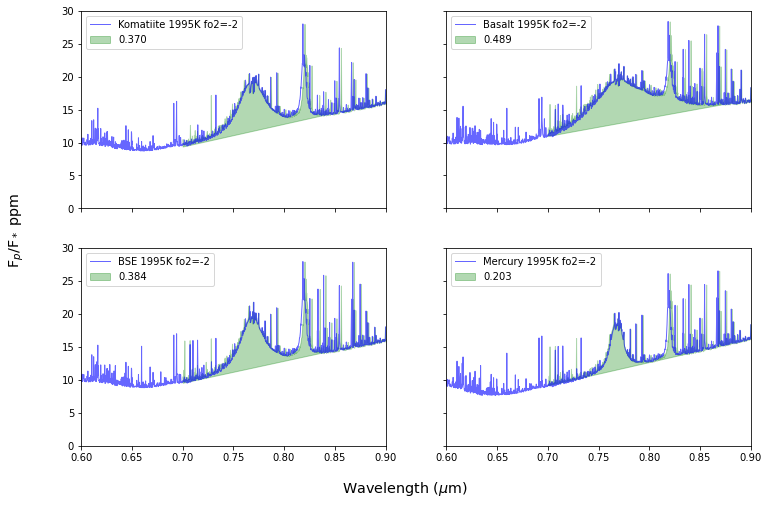

In [9]:
#Create the figure
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,8),sharex=True,sharey=True)
ax=axes[0,0] #Define an axis to use
#Plot the komattie spectra
read_and_plot(ax, "Komatiite_1995_fo2_-2_flux_ratio.dat",label='Komatiite 1995K fo2=-2',color='blue')
#Customise the axis
ax.set(xlim=[0.6, .9], xlabel='', ylabel='') 
ax.set_ylim(0,30)
#Define the tangent
x = np.linspace(0.7,0.9,720)
y= (34.44690*x-14.7228)
#Fill the area between the spectrum and tanget
ax.fill_between(x,spec[500:1220],y,alpha=0.3,label='0.370',color='green')
ax.legend(loc='best', frameon=True) #Add a legend

ax1=axes[1,0]#Set axis to use
#Plot the BSE data
read_and_plot(ax1, "BSE_1995_fo2_-2_flux_ratio.dat",label='BSE 1995K fo2=-2',color='blue')
#Customise the axis
ax1.set(xlim=[0.6, .85], xlabel='', ylabel='')
ax1.set_ylim(0,30)
y1 = (33.3522*x-13.813) #Plot tanget
#Fill area between the spectrum and tanget
ax1.fill_between(x,spec1[500:1220],y1,alpha=0.3,label='0.384',color='green')
ax1.legend(loc='best', frameon=True) #Add a legend

ax2=axes[0,1]#Set axis to use
#Plot the basalt data
read_and_plot(ax2, "Basalt_1995_fo2_-2_flux_ratio.dat",label='Basalt 1995K fo2=-2',color='blue')
#Customise the axis
ax2.set(xlim=[0.6, .9], xlabel='', ylabel='')
ax2.set_ylim(0,0.006)
y2 = (27.9909*x-8.6) #Plot tangent
#Fill area between the spectrum and tanget
ax2.fill_between(x,spec2[500:1220],y2,alpha=0.3,label='0.489',color='green')
ax2.legend(loc='best', frameon=True) #Add a legend

ax3=axes[1,1]#Set axis to use
#Plot the mercury spectrum
read_and_plot(ax3, "Mercury_1995_fo2_-2_flux_ratio.dat",label='Mercury 1995K fo2=-2',color='blue')
#Customise the axis
ax3.set(xlim=[0.6, .9], xlabel='', ylabel='')
ax3.set_ylim(0,30)
y3 = (35.23*x-15.5)#Plot the tangent
#Fill area between the spectrum and tanget
ax3.fill_between(x,spec3[500:1220],y3,alpha=0.3,label='0.203',color='green')
ax3.legend(loc='upper left', frameon=True)#Add a legend

#Write the axis titles
fig.text(0.5,0.05,'Wavelength ($\mu$m)', va='center', ha='center',fontsize='x-large')
fig.text(0.05,0.5,'F$_p$/F$_*$ ppm', rotation='vertical',va='center', ha='center',fontsize='x-large')
#Save plot
plt.savefig("Spectrums shaded at 0.75um.png")